## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [59]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/


'wget' is not recognized as an internal or external command,
operable program or batch file.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

# explanation notes
every record is a series of variable, 
gives address of the measurement and the time
address is split into two and time is split into three (eg hr, min, sec)
the one counting the smallest intreval (TDC) is measuring a nm roughly
next counter - BX counter, every 30 TDC count
third counter resets every X of BX counts
with a label of which channel provided the signal 
gives a timing

In [6]:
# 1\. Create a Pandas DataFrame reading N rows of the 
#'data_000637.txt' dataset. Choose N to be smaller than or 
# equal to the maximum number of rows and larger that 10k.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
entries = 'data_000637.txt'
#N=30000
df = pd.read_csv(entries)#, nrows=N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [4]:
# 2\. Find out the number of BX in a ORBIT (the value 'x').
#number of BX for ORBIT to increase by 1

In [5]:
print(df[42:130])
#max BX is 3187 in row 42 and 3538 in row 127
#127-42 = 85
x = df["BX_COUNTER"].max()+1
x

     HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
42      1     0           57  3869200167        3187        17
43      1     1            1  3869200168           7        18
44      1     0           64  3869200168           7        16
45      1     1            1  3869200168          13        18
46      1     0           63  3869200168           8        28
..    ...   ...          ...         ...         ...       ...
125     1     0           59  3869200168        1885        14
126     1     0          139  3869200168        1894         0
127     1     0           62  3869200168        3538         4
128     1     0           74  3869200169           1        18
129     1     1           16  3869200169         131        11

[88 rows x 6 columns]


3564

In [6]:
#3\. Find out how much the data taking lasted. 
#You can either make an estimate based on the fraction 
#of the measurements (rows) you read, or perform this check 
#precisely by reading out the whole dataset.

In [7]:
#no rows in df = 1310720
#amount of time taken = (ORB_CNT final row - ORB_CNT first row)*3564*25 in ns
print(df.head(1)["ORBIT_CNT"])
print(df.tail(1)["ORBIT_CNT"])
t_orb = df.iloc[1310719,3]-df.iloc[0,3]
t_bx = t_orb * 3564
t_ns = t_bx * 25

print(t_ns, "ns")
t_s = t_ns / 10 ** 9
print(t_s, "seconds")

0    3869200167
Name: ORBIT_CNT, dtype: int64
1310719    3869211171
Name: ORBIT_CNT, dtype: int64
980456400 ns
0.9804564 seconds


In [8]:
#4\. Create a new column with the absolute time in ns 
#(as a combination of the other three columns with timing information).

In [9]:
#absolute time - ORB_CNT:BX_COUNTER:TDC_MEAS 
#hr:m:s

df['time_ns']=df['TDC_MEAS']*25/30+df['BX_COUNTER']*25
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,19061.666667
1310716,1,1,4,3869211171,763,11,19084.166667
1310717,1,0,64,3869211171,764,0,19100.000000
1310718,1,0,139,3869211171,769,0,19225.000000


In [10]:
#5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [11]:
HEAD_r = np.random.randint(0,2,1310720)
HEAD_r = HEAD_r.reshape(1310720, 1)

df_mod = df.copy()
df_mod['HEAD_r'] = HEAD_r
#print(df_mod)
df_mod.drop(columns = ['HEAD'])
df_mod = df_mod[['HEAD_r', 'FPGA', 'TDC_CHANNEL', 'ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS', 'time_ns']]
df_mod.head()

,HEAD_r,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,0,0,123,3869200167,2374,26,59371.666667
1,0,0,124,3869200167,2374,27,59372.500000
2,0,0,63,3869200167,2553,28,63848.333333
3,0,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333


In [12]:
#6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [13]:
df_new = df_mod[df_mod['HEAD_r'] > 0]
#df_new.dropna(how = 'any')
df_new

,HEAD_r,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
9,1,0,60,3869200167,2788,7,69705.833333
11,1,0,64,3869200167,2786,19,69665.833333
19,1,0,53,3869200167,2796,26,69921.666667
...,...,...,...,...,...,...,...
1310704,1,0,26,3869211171,19,15,487.500000
1310705,1,0,94,3869211171,43,22,1093.333333
1310706,1,0,28,3869211171,44,29,1124.166667
1310718,1,0,139,3869211171,769,0,19225.000000


In [14]:
#7\. Make two occupancy plots (one for each FPGA), 
#i.e. plot the number of counts per TDC channel

(array([ 11044.,  23915.,  35431.,  97304., 190466.,  12368.,  12910.,
          4755.,  34571.,  37939.]),
 array([  1. ,  14.8,  28.6,  42.4,  56.2,  70. ,  83.8,  97.6, 111.4,
        125.2, 139. ]),
 <a list of 10 Patch objects>)

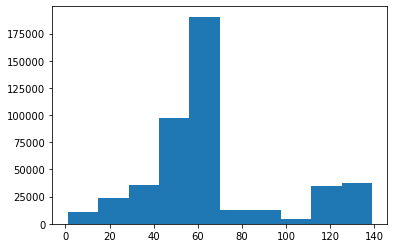

In [33]:
#FPGA = 0
#num counts per TDC
plt.hist(df_new[df_new['FPGA']==0]['TDC_CHANNEL'])

(array([111818.,  27463.,  11069.,   7760.,   5531.,   1528.,   1409.,
          4505.,   4435.,  17980.]),
 array([  1. ,  14.8,  28.6,  42.4,  56.2,  70. ,  83.8,  97.6, 111.4,
        125.2, 139. ]),
 <a list of 10 Patch objects>)

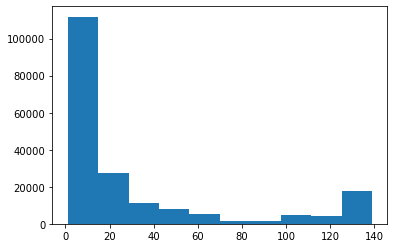

In [34]:
#FPGA = 1 
plt.hist(df_new[df_new['FPGA']==1]['TDC_CHANNEL'])

In [25]:
#8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [37]:
df_count = df_new.groupby(["TDC_CHANNEL"])[['TDC_MEAS']].count()
#print(df_count)
rslt_df = df_count.sort_values(by = 'TDC_MEAS', ascending = False)
print(rslt_df.head(3))
print("noisiest TDC channels are 139, 64, 63")


             TDC_MEAS
TDC_CHANNEL          
139             54076
64              33074
63              32215
noisiest TDC channels are 139, 64, 63


In [52]:
#9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [47]:
df_new.groupby(['ORBIT_CNT'])[['TDC_CHANNEL']].count().sort_values(by = 'TDC_CHANNEL', ascending=True)


,TDC_CHANNEL
ORBIT_CNT,
3869205800,1
3869205186,1
3869204142,1
3869203571,1
3869204462,1
...,...
3869209661,155
3869206454,162
3869209816,165
